In [2]:
# Import necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load CSV file
data = pd.read_csv("/Users/buketalkan/Downloads/metadata.csv")

# Initialize a bipartite graph
B_low = nx.Graph()

# Define nodes and edges based on low-incidence municipalities and selected factors
low_incidence_municipalities = ["Abejorral", "Alejandría", "Angelópolis", 
                                "Angostura", "Argelia", "Belmira", "Caicedo", 
                                "Campamento", "Caramanta", "El Carmen de Viboral"]


# Add municipality nodes and their edges to sociodemographic factors
for municipality in low_incidence_municipalities:
    # Add municipality node
    B_low.add_node(municipality, type="municipality")
    
    # Add edges for each sociodemographic factor with weights
    B_low.add_edge(municipality, "Water Access", weight=data.loc[data['Municipality'] == municipality, 'Householdswithoutwateraccess(%)'].values[0])
    B_low.add_edge(municipality, "Housing Density", weight=data.loc[data['Municipality'] == municipality, 'NumberofhousesperKm2'].values[0])
    B_low.add_edge(municipality, "Education Level", weight=data.loc[data['Municipality'] == municipality, 'Secondary/HigherEducation(%)'].values[0])

# Check nodes and edges to verify
print("Nodes:", B_low.nodes(data=True))
print("Edges:", B_low.edges(data=True))


Matplotlib is building the font cache; this may take a moment.


Nodes: [('Abejorral', {'type': 'municipality'}), ('Water Access', {}), ('Housing Density', {}), ('Education Level', {}), ('Alejandría', {'type': 'municipality'}), ('Angelópolis', {'type': 'municipality'}), ('Angostura', {'type': 'municipality'}), ('Argelia', {'type': 'municipality'}), ('Belmira', {'type': 'municipality'}), ('Caicedo', {'type': 'municipality'}), ('Campamento', {'type': 'municipality'}), ('Caramanta', {'type': 'municipality'}), ('El Carmen de Viboral', {'type': 'municipality'})]
Edges: [('Abejorral', 'Water Access', {'weight': 21.87}), ('Abejorral', 'Housing Density', {'weight': 11.945674}), ('Abejorral', 'Education Level', {'weight': 33.65}), ('Water Access', 'Alejandría', {'weight': 17.06}), ('Water Access', 'Angelópolis', {'weight': 8.39}), ('Water Access', 'Angostura', {'weight': 19.29}), ('Water Access', 'Argelia', {'weight': 22.68}), ('Water Access', 'Belmira', {'weight': 28.28}), ('Water Access', 'Caicedo', {'weight': 16.71}), ('Water Access', 'Campamento', {'weig

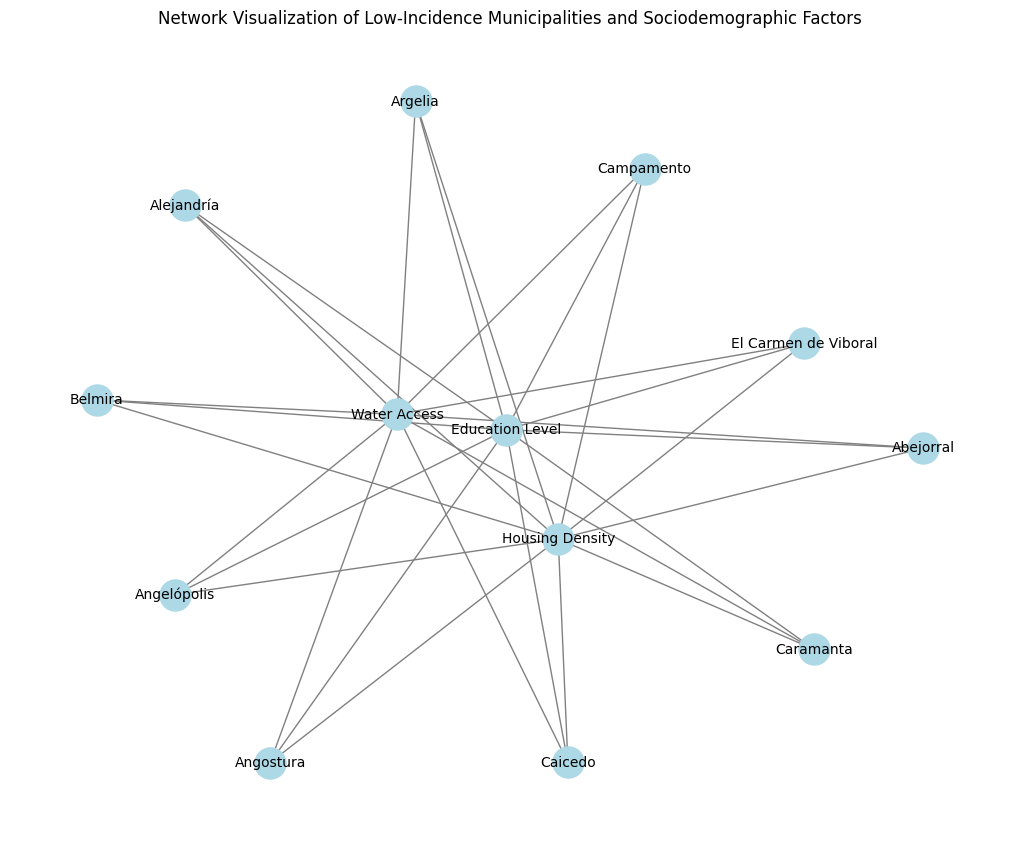

In [5]:
# Set up positions and plot
pos_low = nx.spring_layout(B_low, k=0.15)
plt.figure(figsize=(10, 8))
nx.draw(B_low, pos_low, with_labels=True, node_size=500, node_color="lightblue", font_size=10, edge_color="gray")
plt.title("Network Visualization of Low-Incidence Municipalities and Sociodemographic Factors")
plt.show()


In [7]:
# Calculate weighted degree centrality
weighted_degree_centrality_low = nx.degree_centrality(B_low)
weighted_degree_centrality_weighted_low = {node: sum(B_low[node][neighbor]['weight'] for neighbor in B_low[node]) for node in B_low}

# Calculate betweenness centrality (use weight)
betweenness_centrality_low = nx.betweenness_centrality(B_low, weight='weight')

# Display top 5 nodes by weighted degree centrality and betweenness centrality
top_weighted_degree_low = sorted(weighted_degree_centrality_weighted_low.items(), key=lambda x: x[1], reverse=True)[:5]
top_betweenness_low = sorted(betweenness_centrality_low.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 nodes by Weighted Degree Centrality (Low-Incidence):", top_weighted_degree_low)
print("Top 5 nodes by Betweenness Centrality (Low-Incidence):", top_betweenness_low)


Top 5 nodes by Weighted Degree Centrality (Low-Incidence): [('Education Level', 390.54999999999995), ('Water Access', 185.45), ('Housing Density', 138.27548600000003), ('El Carmen de Viboral', 98.316518), ('Belmira', 78.936882)]
Top 5 nodes by Betweenness Centrality (Low-Incidence): [('Housing Density', 0.48484848484848486), ('Water Access', 0.24242424242424243), ('Alejandría', 0.030303030303030304), ('Angelópolis', 0.030303030303030304), ('Campamento', 0.030303030303030304)]


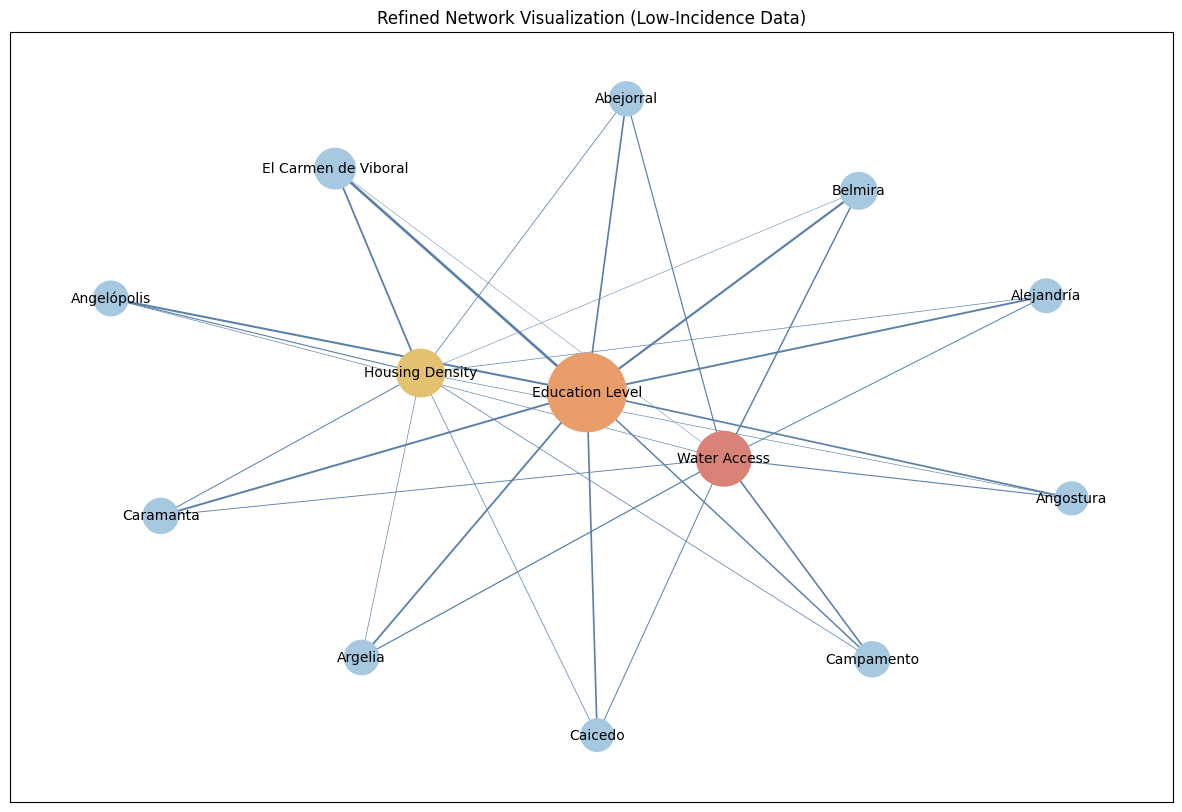

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Define colors based on the new palette
municipality_color = "#A6C8E0"  # Light blue for municipalities
housing_density_color = "#E3C170"  # Yellow for Housing Density
education_level_color = "#E89D6A"  # Orange for Education Level
water_access_color = "#D98378"  # Red for Water Access
edge_color = "#5A80A8"  # Dark blue for edges

# Set up larger figure size
plt.figure(figsize=(15, 10))

# Choose a layout with increased spacing
pos_low = nx.spring_layout(B_low, k=2.0, seed=42)  # Higher k for more spread

# Assign colors based on the new scheme
node_colors_low = []
for node in B_low.nodes():
    if node == "Water Access":
        node_colors_low.append(water_access_color)
    elif node == "Housing Density":
        node_colors_low.append(housing_density_color)
    elif node == "Education Level":
        node_colors_low.append(education_level_color)
    else:
        node_colors_low.append(municipality_color)  # Municipalities

# Draw nodes with smaller sizes based on weighted degree centrality
node_sizes_low = [60 + (weighted_degree_centrality_weighted_low[node] * 8) for node in B_low]  # Smaller scaling factor
nx.draw_networkx_nodes(B_low, pos_low, node_size=node_sizes_low, node_color=node_colors_low, label='Municipalities and Factors')

# Draw edges with the new dark blue color and reduced width scaling
edge_widths_low = [0.2 + B_low[u][v]['weight'] * 0.03 for u, v in B_low.edges()]  # Smaller scaling for edges
nx.draw_networkx_edges(B_low, pos_low, width=edge_widths_low, edge_color=edge_color)  # Set edges to dark blue

# Draw labels
nx.draw_networkx_labels(B_low, pos_low, font_size=10, font_color="black")

# Title
plt.title("Refined Network Visualization (Low-Incidence Data)")
plt.show()
